# DAMASK tutorial
- creating necessary inputs for damask
- runing the damask jobs

here more option is given to the user to select from damask python package itself.

## Importing libraries and creatign Project

In [1]:
from pyiron_continuum import Project
%matplotlib inline

In [2]:
pr = Project("damask_proj")

In [3]:
pr.remove_jobs(silently=True) # remove the old or existing folder

0it [00:00, ?it/s]

## Creating the Damask job

In [4]:
job = pr.create.job.DAMASK("damask_job")

## Creating the necessary inputs

In [5]:
grains=8;grids=16 # defines the number of grains and grids

### Homogenization

In [6]:
homogenization = pr.create.DAMASK.homogenization(method='SX', 
                                                 parameters={'N_constituents': 1,
                                                             "mechanical": {"type": "pass"}})

/home/jovyan/dev/pyiron_continuum/pyiron_continuum/project.py:84: UserWarning: Setting homogenization via project creator is deprecated. Use job.set_homogenization instead
  warnings.warn(


In [7]:
homogenization = pr.continuum.damask.Homogenization(method='SX', 
                                                     parameters={'N_constituents': 1,
                                                                 "mechanical": {"type": "pass"}})

### Elasticity

In [8]:
elasticity = pr.continuum.damask.Elasticity(type= 'Hooke', C_11= 106.75e9,
                                   C_12= 60.41e9, C_44=28.34e9)

### Plasticity

In [9]:
plasticity = pr.continuum.damask.Plasticity(type='phenopowerlaw',
                                            N_sl=[12],a_sl=[2.25],
                                            atol_xi=1.0,dot_gamma_0_sl=[0.001],
                                            h_0_sl_sl=[75.0e6],
                                            h_sl_sl=[1, 1, 1.4, 1.4, 1.4, 1.4, 1.4],
                                            n_sl=[20],
                                            output=['xi_sl'],
                                            xi_0_sl=[31.0e6],
                                            xi_inf_sl=[63.0e6]
                                           )  

### Phase

In [10]:
phase = pr.continuum.damask.Phase(composition='Aluminum', lattice= 'cF',
                         output_list=['F', 'P', 'F_e', 'F_p', 'L_p', 'O'],
                         elasticity=elasticity, plasticity=plasticity)

### Rotation

In [11]:
rotation = pr.continuum.damask.Rotation(shape=grains)

### Material

In [12]:
material = pr.continuum.damask.Material([rotation],['Aluminum'], phase, homogenization)

In [13]:
job.material = material

/home/jovyan/dev/pyiron_continuum/pyiron_continuum/damask/damaskjob.py:165: UserWarning: Setting material via project creator is deprecated. Use job.set_material instead
  warnings.warn(


### Grid

In [14]:
grid = pr.continuum.damask.Grid.via_voronoi_tessellation(box_size=1.0e-5, spatial_discretization=grids, num_grains=grains)

In [15]:
job.grid = grid

/home/jovyan/dev/pyiron_continuum/pyiron_continuum/damask/damaskjob.py:213: UserWarning: Setting grid via project creator is deprecated. Use job.set_grid instead
  warnings.warn(


### Loading

In [16]:
load_step =[{'mech_bc_dict':{'dot_F':[1e-3,0,0, 0,'x',0,  0,0,'x'],
                            'P':['x','x','x', 'x',0,'x',  'x','x',0]},
            'discretization':{'t': 10.,'N': 40},
            'additional': {'f_out': 4}
           },{'mech_bc_dict':{'dot_F':[1e-3,0,0, 0,'x',0,  0,0,'x'],
                              'P':['x','x','x', 'x',0,'x',  'x','x',0]},
            'discretization':{'t': 60.,'N': 60},
            'additional': {'f_out': 4}
           }]

In [17]:
solver = job.list_solvers()[0]

In [18]:
job.loading = pr.continuum.damask.Loading(solver=solver, load_steps=load_step)

/home/jovyan/dev/pyiron_continuum/pyiron_continuum/damask/damaskjob.py:224: UserWarning: Setting loading via project creator is deprecated. Use job.set_loading instead
  warnings.warn(


## Runing the job

In [19]:
job.run()

The job damask_job was saved and received the ID: 7923


In [20]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,7923,finished,None,damask_job,/damask_job,None,/home/jovyan/dev/pyiron_continuum/notebooks/damask_proj/,2024-04-18 09:15:04.249266,2024-04-18 09:17:43.378586,159.0,pyiron@b95581055f92#1,DAMASK,0.4,None,None


## Post-processing

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varepsilon_z$$_z$', ylabel='$\\sigma_z$$_z$(Pa)'>)

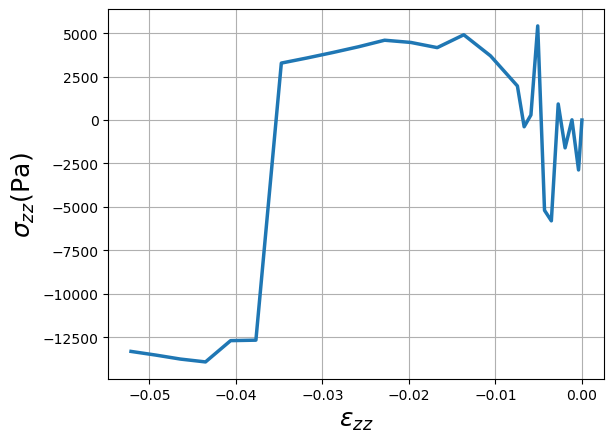

In [21]:
job.plot_stress_strain(component='zz')

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varepsilon_{vM}$', ylabel='$\\sigma_{vM}$ (Pa)'>)

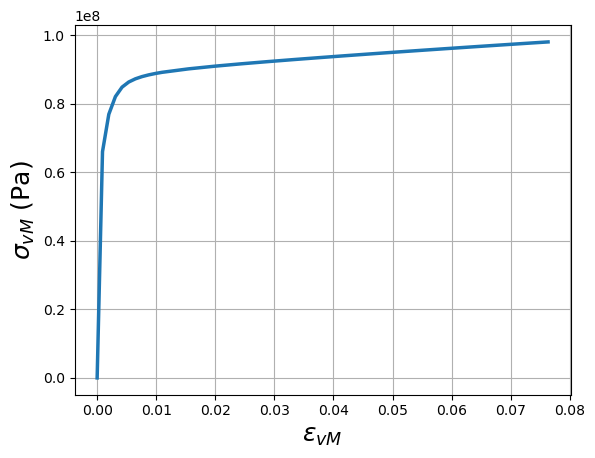

In [22]:
job.plot_stress_strain(von_mises=True)

In [23]:
job.output.damask.view(increments=80)

Created by DAMASK_grid v3.0.0-beta
        on 2024-04-18 09:15:05+0000
 executing "DAMASK_grid -m material.yaml -l loading.yaml -g damask.vti"

increment_80 (50.0 s)
  phase
    Aluminum
      mechanical
        F / 1: deformation gradient
        F_e / 1: elastic deformation gradient
        F_p / 1: plastic deformation gradient
        L_p / 1/s: plastic velocity gradient
        O / 1: crystal orientation as quaternion q_0 (q_1 q_2 q_3)
        P / Pa: first Piola-Kirchhoff stress
        epsilon_V^0.0(F) / 1: Seth-Hill strain tensor of order 0.0 based on left stretch tensor of F (deformation gradient)
        epsilon_V^0.0(F)_vM / 1: Mises equivalent strain of epsilon_V^0.0(F) (Seth-Hill strain tensor of order 0.0 based on left stretch tensor of F (deformation gradient))
        sigma / Pa: Cauchy stress calculated from P (first Piola-Kirchhoff stress) and F (deformation gradient)
        sigma_vM / Pa: Mises equivalent stress of sigma (Cauchy stress calculated from P (first Piola-

In [24]:
job.output.stress

array([[[-1.82931870e-05,  4.03373194e-07, -2.20768485e-06],
        [ 4.03373194e-07, -1.40240419e-05, -7.79412085e-07],
        [-2.20768485e-06, -7.79412085e-07, -1.62488592e-05]],

       [[ 6.58222607e+07,  6.78748067e+05,  3.66173297e+05],
        [ 6.78748067e+05, -3.10055312e+03, -7.10455918e+04],
        [ 3.66173297e+05, -7.10455918e+04, -2.87274565e+03]],

       [[ 7.45706064e+07,  2.84348488e+06,  2.57836492e+06],
        [ 2.84348488e+06,  2.07167689e+03,  6.16685036e+05],
        [ 2.57836492e+06,  6.16685036e+05,  1.34639759e+01]],

       [[ 7.69354386e+07,  4.93930538e+06,  3.59133722e+06],
        [ 4.93930538e+06,  1.49018700e+03,  6.57470260e+05],
        [ 3.59133722e+06,  6.57470260e+05, -1.60051911e+03]],

       [[ 7.79095963e+07,  6.10733133e+06,  3.99400027e+06],
        [ 6.10733133e+06, -3.80823874e+03,  4.86144588e+05],
        [ 3.99400027e+06,  4.86144588e+05,  9.26111540e+02]],

       [[ 7.83702642e+07,  6.64108653e+06,  4.16845621e+06],
        [ 6.64